In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [10]:
# Load dataset (MNIST Handwritten Digits)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
# Normalize pixel values to [0, 1] range
X_train, X_test = X_train / 255.0, X_test / 255.0

In [12]:
# Reshape for Dense layers (flatten images)
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [13]:
# Convert labels to categorical format (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [14]:
# Define the improved neural network model
model = keras.Sequential([
    layers.Input(shape=(28*28,)),  # Input layer
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),  # Normalize activations
    layers.Dropout(0.3),  # Prevent overfitting
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])


In [15]:
# Compile the model with an optimizer and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [17]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=30, 
                    batch_size=64, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping])


Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.7875 - loss: 0.6932 - val_accuracy: 0.9548 - val_loss: 0.1423
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9355 - loss: 0.2174 - val_accuracy: 0.9654 - val_loss: 0.1078
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9531 - loss: 0.1587 - val_accuracy: 0.9718 - val_loss: 0.0925
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9576 - loss: 0.1418 - val_accuracy: 0.9742 - val_loss: 0.0869
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9624 - loss: 0.1291 - val_accuracy: 0.9754 - val_loss: 0.0810
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9668 - loss: 0.1119 - val_accuracy: 0.9769 - val_loss: 0.0724
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9694 - loss: 0.0996 - val_accuracy: 0.9785 - val_loss: 0.0690
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9708 - loss: 0.0955 - 

In [18]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9803 - loss: 0.0634
Test Accuracy: 98.37%


In [23]:
pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 6.7 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 5.6 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 5.6 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/8.1 MB 5.8 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 6.2 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.9 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------- ----------- 1.6/2.2 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 6.2 MB/s eta 0:0

In [24]:
import matplotlib.pyplot as plt

In [25]:
# Extract accuracy and loss data from history
epochs_range = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [26]:
# Create a figure with two subplots
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

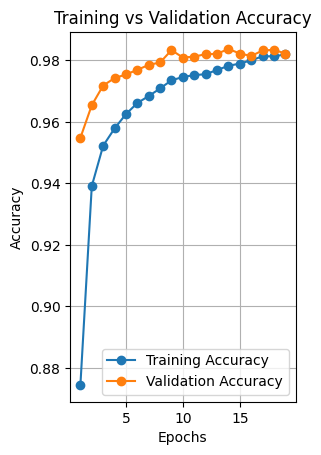

In [27]:
# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)


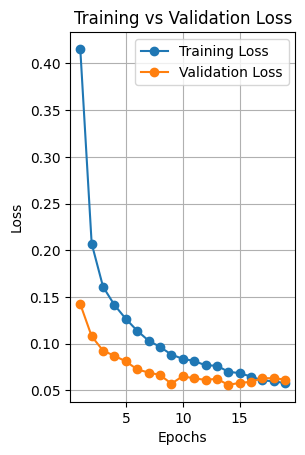

In [28]:
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)